> Simulation Tables

# import

In [1]:
import pandas as pd

In [228]:
data_fivenodes = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_fivedones_Simulation.csv')

In [229]:
data_chickenpox = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_chikenpox_Simulation.csv')

In [230]:
data_pedal = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_pedalme_Simulation.csv')

In [231]:
data_pedal2 = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_pedalme_Simulation_itstgcnsnd.csv')

In [232]:
data__wiki = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_wikimath.csv')

In [233]:
data_wiki_GSO = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_wikimath_GSO_st.csv')

In [ ]:
data_windmillsmall = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_windmillsmall.csv')

In [234]:
data_monte = pd.read_csv('./simulation_results/Real_simulation_reshape/GConvLSTM_monte.csv')

In [ ]:
data = pd.concat([data_fivenodes,data_chickenpox,data_pedal,data__wiki,data_windmillsmall,data_monte]);data

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
0,fivenodes,STGCN,0.800000,rand,2,12,linear,5,1.318918,5.152497
1,fivenodes,STGCN,0.800000,rand,2,12,nearest,5,1.338384,5.266702
2,fivenodes,IT-STGCN,0.800000,rand,2,12,linear,5,1.243476,5.745141
3,fivenodes,IT-STGCN,0.800000,rand,2,12,nearest,5,1.240016,5.647362
4,fivenodes,STGCN,0.800000,rand,2,12,linear,5,1.271483,5.329065
...,...,...,...,...,...,...,...,...,...,...
205,monte,IT-STGCN,0.149142,block,4,12,nearest,50,0.950054,413.728295
206,monte,STGCN,0.149142,block,4,12,nearest,50,0.956801,305.512810
207,monte,IT-STGCN,0.149142,block,4,12,nearest,50,0.953905,373.807169
208,monte,STGCN,0.149142,block,4,12,nearest,50,0.971183,326.134685


# Fivenodes

## Baseline

In [204]:
pd.merge(data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,lags,mean,std
0,12,IT-STGCN,2,1.281,0.046
1,12,STGCN,2,1.277,0.036


## Random

In [205]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("nof_filters==12")

,mrate,nof_filters,method,lags,mean,std
0,0.7,12,IT-STGCN,2,1.288,0.045
1,0.7,12,STGCN,2,1.278,0.041
2,0.8,12,IT-STGCN,2,1.288,0.044
3,0.8,12,STGCN,2,1.288,0.049


## Block

In [206]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,mean,std
0,0.012,12,IT-STGCN,0.862,0.051
1,0.012,12,STGCN,0.862,0.043


# ChickenpoxDatasetLoader(lags=4)

## Baseline

In [207]:
pd.merge(data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("nof_filters==16")

,nof_filters,method,mean,std
0,16,IT-STGCN,0.880,0.041
1,16,STGCN,0.872,0.051


## Random

In [208]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,inter_method,nof_filters,method,mean,std
0,0.3,linear,16,IT-STGCN,1.076,0.038
1,0.3,linear,16,STGCN,1.059,0.037
2,0.8,linear,16,IT-STGCN,2.180,0.182
3,0.8,linear,16,STGCN,2.195,0.165


## Block

In [209]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'})

,inter_method,mrate,nof_filters,method,mean,std
0,linear,0.28777,16,IT-STGCN,0.878286,0.035118
1,linear,0.28777,16,STGCN,0.884183,0.038562
2,nearest,0.28777,16,IT-STGCN,0.892323,0.037233
3,nearest,0.28777,16,STGCN,0.891607,0.040933


# PedalMeDatasetLoader (lags=4)

## Baseline

In [210]:
pd.merge(data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,lags,nof_filters,method,mean,std
0,4,12,IT-STGCN,1.231,0.052
1,4,12,STGCN,1.217,0.057


## Random

In [211]:
pd.merge(data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.318,0.089
1,0.3,4,linear,STGCN,1.323,0.086
2,0.3,4,nearest,IT-STGCN,1.289,0.064
3,0.3,4,nearest,STGCN,1.305,0.063
4,0.6,4,linear,IT-STGCN,1.504,0.080
5,0.6,4,linear,STGCN,1.523,0.083
6,0.6,4,nearest,IT-STGCN,1.526,0.073
7,0.6,4,nearest,STGCN,1.518,0.092


## Block

In [212]:
pd.merge(data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.250,0.055
1,0.286,4,linear,STGCN,1.217,0.054
2,0.286,4,nearest,IT-STGCN,1.268,0.049
3,0.286,4,nearest,STGCN,1.283,0.048


## W_st

In [213]:
pd.merge(data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.793,0.284
1,0.3,4,linear,STGCN,1.321,0.102
2,0.3,4,nearest,IT-STGCN,1.884,0.250
3,0.3,4,nearest,STGCN,1.316,0.085
4,0.6,4,linear,IT-STGCN,1.693,0.240
5,0.6,4,linear,STGCN,1.530,0.079
6,0.6,4,nearest,IT-STGCN,1.740,0.255
7,0.6,4,nearest,STGCN,1.520,0.059


In [214]:
pd.merge(data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.19,4,linear,IT-STGCN,1.794,0.253
1,0.19,4,linear,STGCN,1.239,0.037
2,0.19,4,nearest,IT-STGCN,1.709,0.262
3,0.19,4,nearest,STGCN,1.283,0.047


# WikiMathsDatasetLoader (lags=8)

## Baseline

In [215]:
pd.merge(data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,nof_filters,method,mean,std
0,8,12,IT-STGCN,0.626,0.026
1,8,12,STGCN,0.628,0.031


## Random

In [216]:
pd.merge(data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.3,8,IT-STGCN,0.641,0.021
1,0.3,8,STGCN,0.642,0.023
2,0.8,8,IT-STGCN,0.778,0.038
3,0.8,8,STGCN,0.781,0.036


## Block

In [217]:
pd.merge(data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,method,mean,std
0,0.000192,8,IT-STGCN,0.623239,0.020829
1,0.000192,8,STGCN,0.625788,0.030826


## missing values on the same nodes

In [218]:
pd.merge(data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
        data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.512,8,IT-STGCN,0.600,0.073
1,0.512,8,STGCN,0.705,0.029


# WindmillOutputSmallDatasetLoader (lags=8)

## Baseline

In [219]:
pd.merge(data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,lags,method,std


## Random

In [220]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,mrate,lags,method,std


## Block

In [221]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,mrate,lags,method,std


# Montevideobus (lags=4)

## Baseline

In [236]:
pd.merge(data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,method,mean,std
0,4,IT-STGCN,0.969,0.010
1,4,STGCN,0.967,0.012


## Random

In [237]:
pd.merge(data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['mrate','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.8,4,nearest,IT-STGCN,1.141635,0.057683
1,0.8,4,nearest,STGCN,1.135320,0.066630


## Block

In [238]:
pd.merge(data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.000298,4,linear,IT-STGCN,0.971695,0.010203
1,0.000298,4,linear,STGCN,0.973715,0.015855
2,0.000298,4,nearest,IT-STGCN,0.969282,0.012095
3,0.000298,4,nearest,STGCN,0.977350,0.015155
4,0.149142,4,nearest,IT-STGCN,0.954439,0.005236
5,0.149142,4,nearest,STGCN,0.957172,0.006630


# Check

In [225]:
import itstgcnGConvLSTM
import torch
import numpy as np

In [226]:
import matplotlib.pyplot as plt

In [227]:
import random

In [57]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [58]:
import pickle
import pandas as pd

In [59]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

In [60]:
from plotnine import *

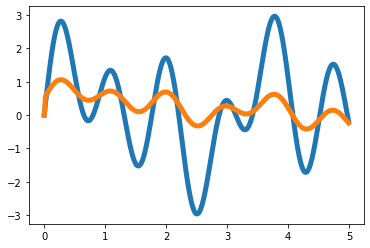

In [407]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.sin(4*t)+1.5*np.sin(7*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [408]:
loader1 = itstgcnGConvLSTM.DatasetLoader(data_dict1)

In [409]:
dataset = loader1.get_dataset(lags=2)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [410]:
mindex = [random.sample(range(0, T), int(T*0.6)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnGConvLSTM.miss(dataset,mindex,mtype='block')

In [411]:
dataset_padded = itstgcnGConvLSTM.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [412]:
lrnr_GConvGRU = itstgcnGConvLSTM.StgcnLearner(dataset_padded)

In [427]:
lrnr_GConvGRU.learn(filters=2,epoch=5)

In [428]:
lrnr_GConvGRU1 = itstgcnGConvLSTM.ITStgcnLearner(dataset_padded)

In [429]:
lrnr_GConvGRU1.learn(filters=2,epoch=5)

In [430]:
evtor_GConvGRU = Eval_csy(lrnr_GConvGRU,dataset_padded)

In [431]:
evtor_GConvGRU1 = Eval_csy(lrnr_GConvGRU1,dataset_padded)

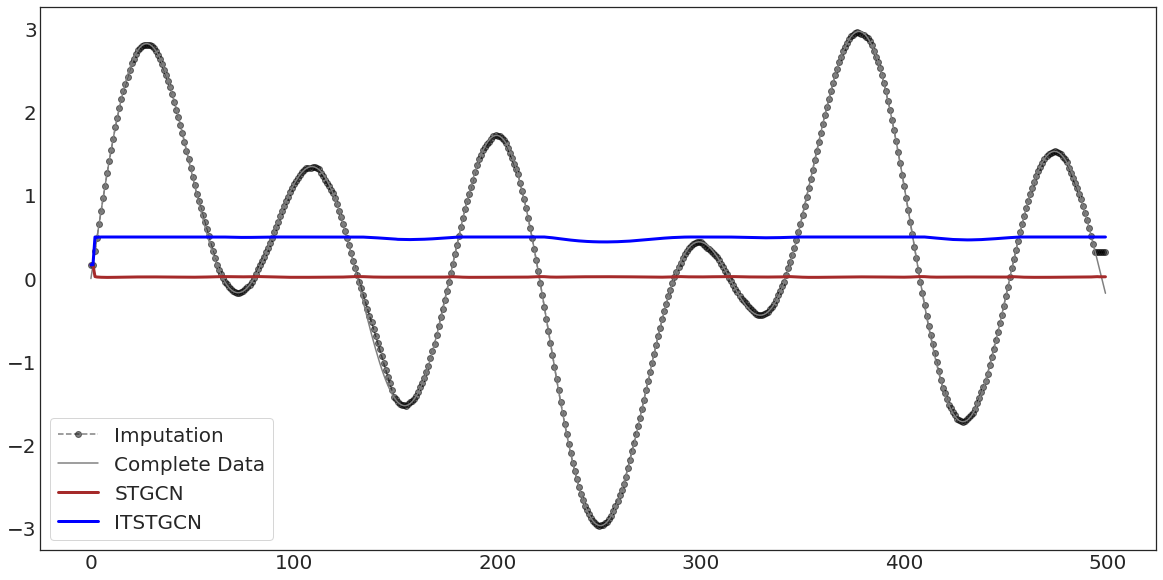

In [432]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

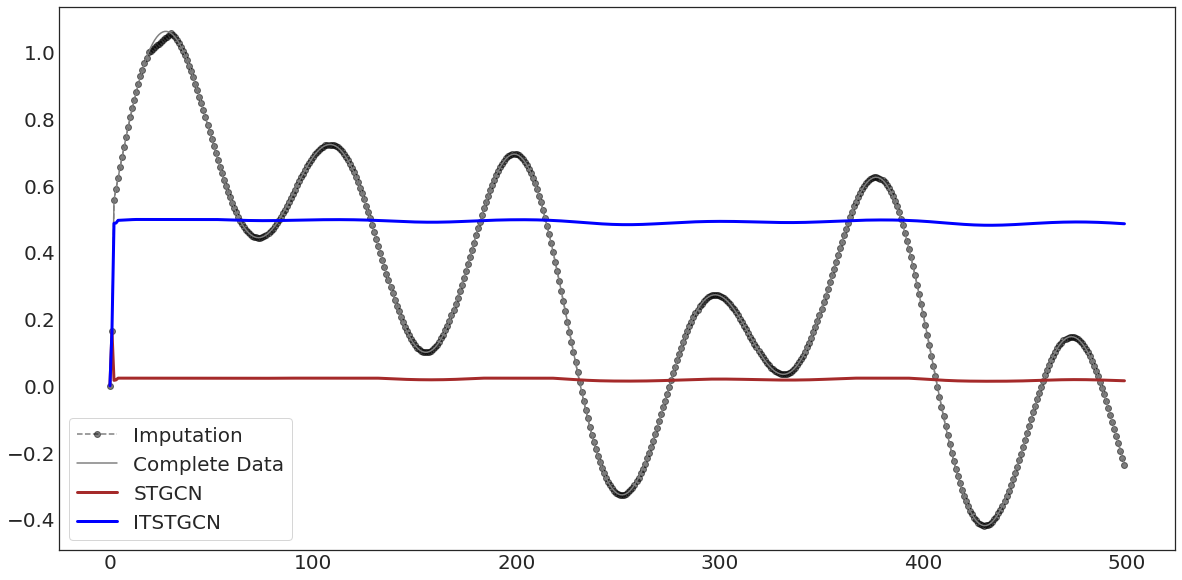

In [433]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [290]:
import itstgcnsnd
import torch
import numpy as np

In [111]:
loader1 = itstgcnsnd.DatasetLoader(data_dict1)

In [112]:
dataset = loader1.get_dataset(lags=1)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [113]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnsnd.miss(dataset,mindex,mtype='block')

In [114]:
dataset_padded = itstgcnsnd.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [115]:
lrnr_GConvGRU = itstgcnsnd.StgcnLearner(dataset_padded)

In [116]:
lrnr_GConvGRU.learn(filters=32,epoch=5)

In [117]:
lrnr_GConvGRU1 = itstgcnsnd.ITStgcnLearner(dataset_padded)

In [ ]:
lrnr_GConvGRU1.learn(filters=32,epoch=5)

In [ ]:
evtor_GConvGRU = Eval_csy(lrnr_GConvGRU,dataset_padded)

In [ ]:
evtor_GConvGRU1 = Eval_csy(lrnr_GConvGRU1,dataset_padded)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor_GConvGRU.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor_GConvGRU.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor_GConvGRU1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)